In [1]:
%pylab inline
import io3d
import skelet3d
from pathlib import Path
import copy
import glob
import time
import pandas as pd
import sed3

Populating the interactive namespace from numpy and matplotlib
PyQt5 detected


In [2]:
def vessel_skeleton_extraction(pth1):
    
    volume_data = np.zeros([100,100,100])
    volume_data[30:40,20:70,30:40] = 1
    volume_data[32:40,20:30,20:70] = 1#
    volume_data[25:35,40:60,10:80] = 1#3

    voxelsize_mm = [1,1,1]

    skelet = skelet3d.skelet3d(volume_data)
    return skelet, volume_data, voxelsize_mm

def skeleton_analysis(skelet, volume_data, voxelsize_mm):
    skan = skelet3d.SkeletonAnalyser(skelet, volume_data=volume_data, voxelsize_mm=voxelsize_mm)
    stats = skan.skeleton_analysis()

    df = stats_as_dataframe(skan)
    return df

def extract_df(df):
    dfs = df[["id", 
        'nodeIdA', 
        'nodeIdB',
        "nodeA_ZYX 0", 
        "nodeA_ZYX 1", 
        "nodeA_ZYX 2", 
        "nodeB_ZYX 0",
        "nodeB_ZYX 1",
        "nodeB_ZYX 2",
        "nodeA_ZYX_mm 0", 
        "nodeA_ZYX_mm 1", 
        "nodeA_ZYX_mm 2", 
        "nodeB_ZYX_mm 0",
        "nodeB_ZYX_mm 1",
        "nodeB_ZYX_mm 2",
        "radius_mm",
        "connectedEdgesA 0",
        "connectedEdgesA 1",
        "connectedEdgesA 2",
        "connectedEdgesB 0",
        "connectedEdgesB 1",
        "connectedEdgesB 2",
       ]]
    dfs.to_csv(str(pth1) + ".csv")
    return dfs

In [3]:
def stats_as_dataframe(self):
        import pandas as pd
        import exsu.dili
        if self.stats is None:
            msg = "Run skeleton_analyser before stats_as_dataframe()"
            logger.error(msg)
            raise RuntimeError(msg)

        # import imtools.dili
        df = pd.DataFrame()
        for stats_key in self.stats:
            one_edge = copy.copy(self.stats[stats_key])
            k = "orderedPoints_mm_X"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm_Y"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm_Z"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            # one_edge[]
            one_dct = exsu.dili.flatten_dict_join_keys(one_edge, simplify_iterables=True)
            # df_one = pd.DataFrame(one_dct)

            df_one = pd.DataFrame([list(one_dct.values())], columns=list(one_dct.keys()))
            df = df.append(df_one, ignore_index=True)
        return df

In [9]:
# for pth1 in pths:
#     vesse

outputs = vessel_skeleton_extraction('ig')
skelet = outputs[0]
volumeData = outputs[1]
both = ((skelet+volumeData)>0)*255
both[skelet!=0] = 128
io3d.write(skelet,'skelet.dcm') #další formáty: tiff, mhd
io3d.write(volumeData.astype(np.int16),'volData.dcm')
io3d.write(both.astype(np.int16),'both.dcm')

io3d.write(both.astype(np.uint8),'both/{:04d}.png')


projection = np.max(skelet!=0,axis=0)*255
projection = projection.reshape([1,projection.shape[0],projection.shape[1]])

io3d.write(projection.astype(np.uint8),'projection/{:04d}.png')


df = skeleton_analysis(*outputs)
df.to_csv(str('test') + ".csv",sep=';')

#dfs = extract_df(df)

<ipython-input-13-98a76c02af21>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


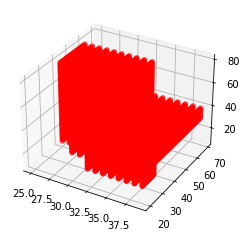

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

volume_data = outputs[1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pos = np.where(volume_data==1)
pos2 = np.where(volume_data==2)
pos3 = np.where(volume_data==3)
#print(pos)
ax.scatter(pos[0], pos[1], pos[2], c='r')
ax.scatter(pos2[0], pos2[1], pos2[2], c='b')
ax.scatter(pos3[0], pos3[1], pos3[2], c='g')
ax.figure.show()

In [41]:
df.keys()

Index(['id', 'nodeIdA', 'nodeIdB', 'connectedEdgesA 0', 'connectedEdgesA 1',
       'connectedEdgesA 2', 'nodeA_ZYX 0', 'nodeA_ZYX 1', 'nodeA_ZYX 2',
       'nodeB_ZYX 0', 'nodeB_ZYX 1', 'nodeB_ZYX 2', 'nodeA_ZYX_mm 0',
       'nodeA_ZYX_mm 1', 'nodeA_ZYX_mm 2', 'nodeB_ZYX_mm 0', 'nodeB_ZYX_mm 1',
       'nodeB_ZYX_mm 2', 'orderedPoints_mm_X', 'orderedPoints_mm_Y',
       'orderedPoints_mm_Z', 'orderedPoints_mm', 'lengthEstimationPixel',
       'curve_params start 0', 'curve_params start 1', 'curve_params start 2',
       'curve_params vector 0', 'curve_params vector 1',
       'curve_params vector 2', 'curve_params fitParamsX 0',
       'curve_params fitParamsX 1', 'curve_params fitParamsX 2',
       'curve_params fitParamsY 0', 'curve_params fitParamsY 1',
       'curve_params fitParamsY 2', 'curve_params fitParamsZ 0',
       'curve_params fitParamsZ 1', 'curve_params fitParamsZ 2',
       'curve_params fitCurveStrX', 'curve_params fitCurveStrY',
       'curve_params fitCurveStrZ', 

# Konec testu

In [42]:
# ~\.io3d_cache.yaml
#pth = Path(io3d.datasets.join_path("medical/processed/porcine_liver_ct_raw", get_root=True))
pth = Path(io3d.datasets.join_path("medical/processed/porcine_liver_ct_raw", get_root=True))
print(pth)
# pths = glob.glob("C:/Users/Jirik/Downloads/porcine_liver_ct_raw/*.mhd")
#
pths = glob.glob(f"{pth}/*.mhd")
#pths = glob.glob("C:/Users/ADMIN/Dokumenty/PROJEKT4/*.mhd")
# pth1 = pths[-1]
# pth1 = pths[2]
display(pths)
pth1 = (pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd")
#pth1 = pth / "P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd"

C:\Users\Admin\data\medical\processed\porcine_liver_ct_raw


['C:\\Users\\Admin\\data\\medical\\processed\\porcine_liver_ct_raw\\P01_MakroCT_HEAD_5_0_H31S_0004.mhd',
 'C:\\Users\\Admin\\data\\medical\\processed\\porcine_liver_ct_raw\\P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd']

# Read the data

In [43]:
# pth1 = pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1 = "C:/Users/Jirik/Downloads/porcine_liver_ct_raw/P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1 = r"C:/Users/Jirik/Downloads/porcine_liver_ct_raw/P01_a_MikroCT-nejhrubsi_rozliseni_DICOM_liver-1st-important_Macro_pixel-size53.0585um.mhd"
# pth1 = Path("g:\Můj disk\data\medical\processed\porcine_liver_ct_raw\P01_MakroCT_HEAD_5_0_H31S_0004.mhd")
print(pth1)
print(Path(pth1).exists())

t0 = time.time()
datap = io3d.read(pth1, datap=True)
print(time.time()-t0)

C:\Users\Admin\data\medical\processed\porcine_liver_ct_raw\P01_MakroCT_HEAD_5_0_H31S_0004.mhd
True
0.14715027809143066


Check loaded data

In [44]:
import scipy.stats
data3d = datap["data3d"]

dsc = scipy.stats.describe(data3d.ravel()[::100])
# print(f"mn={np.min(datap['data3d'])}, mx={np.max(datap['data3d'])} ")
dsc

DescribeResult(nobs=120587, minmax=(-1024, 105), mean=-744.5109588927496, variance=121616.75365521557, skewness=1.2984672323903566, kurtosis=-0.021176384871536946)

In [45]:
import skimage
skimage.__version__

'0.18.1'

### Calculate threshold

In [46]:
# from skimage.filters import threshold_otsu, threshold_multiotsu
from skimage.filters import threshold_otsu
# classes = 5 if Path(pth1).name == 'P01_MakroCT_HEAD_5_0_H31S_0004.mhd'else 2
# thresholds = threshold_multiotsu(datap["data3d"].ravel()[::1000], classes=classes)
# threshold = thresholds[-1]
# classes
if Path(pth1).name in ('P01_MakroCT_HEAD_5_0_H31S_0004.mhd', 'P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd'):
    
    threshold = 0
    data3d = data3d[:,:400,:] # cut the table
    
else:
    threshold = threshold_otsu(data3d.ravel()[::1000])

## Perform the threshold and see the outputs

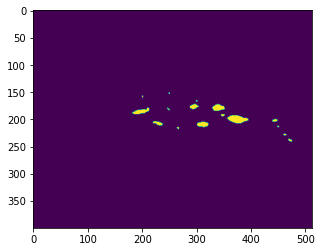

In [47]:

imthr = data3d > threshold
imshow(imthr[int(imthr.shape[0]/2),:,:])

In [48]:
import sed3
sed3.ipy_show_slices(imthr)

AttributeError: module 'sed3' has no attribute 'ipy_show_slices'

# Do the skeleton analysis

## Get the skeleton and find the nodes

In [11]:
volume_data = imthr
t0 = time.time()
skelet = skelet3d.skelet3d(volume_data)
print(time.time()-t0)

# skan = skelet3d.SkeletonAnalyser(skelet, volume_data=volume_data, voxelsize_mm=datap["voxelsize_mm"])
t0 = time.time()
skan = skelet3d.SkeletonAnalyser(
    skelet, 
     volume_data=volume_data, 
    voxelsize_mm=datap["voxelsize_mm"]
)
print(time.time()-t0)
# skan.
print(skan)

3.3438189029693604
0.4003639221191406


## Check the volumetric labeled skeleton data

`sklabel` is 3d array where the value is label. Positive labels are tube segments, negative labels are nodes.

* 0: nothing - backgroud
* 1: First tube segment
* 2: second tube segment
* ...
* -1: First node
* -2: second node

![sklabel](../graphics/sklabel.png)

In [13]:
skan.sklabel.dtype

dtype('int32')

In [12]:

# sklabel_nodes = skan.sklabel.copy()
# sklabel_nodes[sklabel_nodes > 0] = 0
nz = np.nonzero(skan.sklabel < 0)
nz

(array([ 4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 

In [14]:
voxelsize_mm = datap["voxelsize_mm"]

dfs = pd.DataFrame({
    "node_0_px":nz[0],
    "node_1_px":nz[1],
    "node_2_px":nz[2],
    "node_0_mm":nz[0]*voxelsize_mm[0],
    "node_1_mm":nz[1]*voxelsize_mm[1],
    "node_2_mm":nz[2]*voxelsize_mm[2],
})

dfs.to_csv(str(pth1) + ".nodes.csv")
# df["Z_px"]

In [40]:
# io3d.write({"data3d"})
np.savez(str(pth1) + ".npz", sklabel=skan.sklabel, imthr=imthr)

In [41]:

# dir(skan)#.__connection_analysis
# skan._SkeletonAnalyser__connection_analysis(3)

# Time consuming steps - radius analysis

In [15]:
print(skan.volume_data)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

In [16]:
t0 = time.time()
stats = skan.skeleton_analysis()
print(time.time()-t0)

Node -424 is just a curve!!! FIX THIS!!!
Node -397 is just a curve!!! FIX THIS!!!
Node -343 is just a curve!!! FIX THIS!!!
Node -249 is just a curve!!! FIX THIS!!!
Node -177 is just a curve!!! FIX THIS!!!
Node -84 is just a curve!!! FIX THIS!!!
Node -37 is just a curve!!! FIX THIS!!!
Node -29 is just a curve!!! FIX THIS!!!
Only one ([-314]) connected node in connection_analysis() for edge number 258
No B point for edge ID 258. No length computation.
C:\Users\Admin\miniconda3\lib\site-packages\skelet3d\skeleton_analyser.py:608: RuntimeWarning: invalid value encountered in double_scalars
  np.dot(vect, norm) / np.linalg.norm(norm) ** 2) * np.array(norm)
Problem in angle analysis
Traceback (most recent call last):
  File "C:\Users\Admin\miniconda3\lib\site-packages\skelet3d\skeleton_analyser.py", line 170, in skeleton_analysis
    edgst.update(self.__connected_edge_angle(edg_number, stats))
  File "C:\Users\Admin\miniconda3\lib\site-packages\skelet3d\skeleton_analyser.py", line 712, in __

In [18]:



    
df = stats_as_dataframe(skan)

In [19]:
df.keys()

Index(['id', 'nodeIdA', 'nodeIdB', 'nodeA_ZYX 0', 'nodeA_ZYX 1', 'nodeA_ZYX 2',
       'nodeB_ZYX 0', 'nodeB_ZYX 1', 'nodeB_ZYX 2', 'nodeA_ZYX_mm 0',
       'nodeA_ZYX_mm 1', 'nodeA_ZYX_mm 2', 'nodeB_ZYX_mm 0', 'nodeB_ZYX_mm 1',
       'nodeB_ZYX_mm 2', 'orderedPoints_mm_X', 'orderedPoints_mm_Y',
       'orderedPoints_mm_Z', 'orderedPoints_mm', 'lengthEstimationPixel',
       'curve_params start 0', 'curve_params start 1', 'curve_params start 2',
       'curve_params vector 0', 'curve_params vector 1',
       'curve_params vector 2', 'curve_params fitParamsX 0',
       'curve_params fitParamsX 1', 'curve_params fitParamsX 2',
       'curve_params fitParamsY 0', 'curve_params fitParamsY 1',
       'curve_params fitParamsY 2', 'curve_params fitParamsZ 0',
       'curve_params fitParamsZ 1', 'curve_params fitParamsZ 2',
       'curve_params fitCurveStrX', 'curve_params fitCurveStrY',
       'curve_params fitCurveStrZ', 'lengthEstimationPoly',
       'lengthEstimationSpline', 'lengthEstima

In [21]:
datap["voxelsize_mm"]

[5.0, 0.474609, 0.474609]

In [22]:
dfs = df[["id", 
    "nodeA_ZYX 0", 
    "nodeA_ZYX 1", 
    "nodeA_ZYX 2", 
    "nodeB_ZYX 0",
    "nodeB_ZYX 1",
    "nodeB_ZYX 2",
    "nodeA_ZYX_mm 0", 
    "nodeA_ZYX_mm 1", 
    "nodeA_ZYX_mm 2", 
    "nodeB_ZYX_mm 0",
    "nodeB_ZYX_mm 1",
    "nodeB_ZYX_mm 2",
    "radius_mm",
    "connectedEdgesA 0",
    "connectedEdgesA 1",
    "connectedEdgesA 2",
    "connectedEdgesB 0",
    "connectedEdgesB 1",
    "connectedEdgesB 2",
   ]]

dfs

id  nodeA_ZYX 0  nodeA_ZYX 1  nodeA_ZYX 2  nodeB_ZYX 0  nodeB_ZYX 1  \
0      1          4.0        201.0        240.0          4.0   200.000000   
1      2          9.0        190.0        285.0          5.0   192.000000   
2      3         13.0        158.0        220.0          5.0   194.000000   
3      4         11.0        181.0        223.0          6.0   191.000000   
4      5         10.0        216.0        271.0          6.0   218.000000   
..   ...          ...          ...          ...          ...          ...   
295  296         35.0        210.0        297.0         35.0   206.000000   
296  297         35.0        231.0        442.0         34.0   224.333333   
297  298         38.0        239.0        426.0         34.0   224.333333   
298  299         36.0        219.0        315.0         36.0   217.000000   
299  300         37.0        239.0        300.0         37.0   237.000000   

     nodeB_ZYX 2  nodeA_ZYX_mm 0  nodeA_ZYX_mm 1  nodeA_ZYX_mm 2  \
0     237.000000            20.0       95.396409      113.906160   
1     248.000000            45.0       90.175710      135.263565   
2     225.000000            65.0       74.988222      104.413980   
3     210.000000            55.0       85.904229      105.837807   
4     276.000000            50.0      102.515544      128.619039   
..           ...             ...             ...             ...   
295   300.000000           175.0       99.667890      140.958873   
296   426.333333           175.0      109.634679      209.777178   
297   426.333333           190.0      113.431551      202.183434   
298   317.000000           180.0      103.939371      149.501835   
299   301.000000           185.0      113.431551      142.382700   

     nodeB_ZYX_mm 0  nodeB_ZYX_mm 1  nodeB_ZYX_mm 2  radius_mm  \
0              20.0       94.921800      112.482333   0.474609   
1              25.0       91.124928      117.703032   0.704953   
2              25.0       92.074146      106.787025   1.248332   
3              30.0       90.650319       99.667890   1.038047   
4              30.0      103.464762      130.992084   0.628508   
..              ...             ...             ...        ...   
295           175.0       97.769454      142.382700   0.523756   
296           170.0      106.470619      202.341637   0.865931   
297           170.0      106.470619      202.341637   0.962546   
298           180.0      102.990153      150.451053   0.474609   
299           185.0      112.482333      142.857309   0.949218   

     connectedEdgesA 0  connectedEdgesA 1  connectedEdgesA 2  \
0                  NaN                NaN                NaN   
1                 22.0               35.0                NaN   
2                 54.0               71.0                NaN   
3                  NaN                NaN                NaN   
4                 28.0               39.0                NaN   
..                 ...                ...                ...   
295                NaN                NaN                NaN   
296                NaN                NaN                NaN   
297                NaN                NaN                NaN   
298                NaN                NaN                NaN   
299                NaN                NaN                NaN   

     connectedEdgesB 0  connectedEdgesB 1  connectedEdgesB 2  
0                  NaN                NaN                NaN  
1                  NaN                NaN                NaN  
2                  NaN                NaN                NaN  
3                  NaN                NaN                NaN  
4                  NaN                NaN                NaN  
..                 ...                ...                ...  
295                NaN                NaN                NaN  
296              284.0              298.0                NaN  
297              284.0              297.0                NaN  
298                NaN                NaN                NaN  
299      

In [23]:


df.to_csv(str('test') + ".csv",sep=';')

In [21]:
df[df['connectedEdgesB 26']>0]

id  nodeIdA  nodeIdB  nodeA_ZYX 0  nodeA_ZYX 1  nodeA_ZYX 2  \
1646  1647    -1833  -1831.0   402.000000   312.000000   251.000000   
1673  1674    -1852  -1831.0   403.000000   301.333333   247.666667   
1682  1683    -1893  -1831.0   406.000000   297.000000   244.000000   
1684  1685    -1852  -1831.0   403.000000   301.333333   247.666667   
1718  1719    -1964  -1831.0   409.750000   302.750000   238.000000   
1720  1721    -1895  -1831.0   406.000000   304.000000   236.000000   
1748  1749    -1943  -1831.0   408.000000   298.000000   244.000000   
1775  1776    -1982  -1831.0   411.250000   308.500000   234.000000   
1853  1854    -2004  -1831.0   411.000000   307.000000   242.000000   
1855  1856    -2017  -1831.0   414.608696   305.391304   241.565217   
1871  1872    -2017  -1831.0   414.608696   305.391304   241.565217   
1872  1873    -1920  -1831.0   411.000000   300.071429   253.071429   
1896  1897    -2054  -1831.0   414.000000   307.000000   253.000000   
1898  1899    -2054  -1831.0   414.000000   307.000000   253.000000   
1899  1900    -2037  -1831.0   413.000000   310.000000   257.000000   

      nodeB_ZYX 0  nodeB_ZYX 1  nodeB_ZYX 2  nodeA_ZYX_mm 0  ...  \
1646   406.760563   306.619718   246.661972      160.800000  ...   
1673   406.760563   306.619718   246.661972      161.200000  ...   
1682   406.760563   306.619718   246.661972      162.400000  ...   
1684   406.760563   306.619718   246.661972      161.200000  ...   
1718   406.760563   306.619718   246.661972      163.900000  ...   
1720   406.760563   306.619718   246.661972      162.400000  ...   
1748   406.760563   306.619718   246.661972      163.200000  ...   
1775   406.760563   306.619718   246.661972      164.500000  ...   
1853   406.760563   306.619718   246.661972      164.400000  ...   
1855   406.760563   306.619718   246.661972      165.843478  ...   
1871   406.760563   306.619718   246.661972      165.843478  ...   
1872   406.760563   306.619718   246.661972      164.400000  ...   
1896   406.760563   306.619718   246.661972      165.600000  ...   
1898   406.760563   306.619718   246.661972      165.600000  ...   
1899   406.760563   306.619718   246.661972      165.200000  ...   

      connectedEdgesB 26  connectedEdgesB 27  connectedEdgesB 28  \
1646              1825.0              1826.0              1854.0   
1673              1825.0              1826.0              1854.0   
1682              1825.0              1826.0              1854.0   
1684              1825.0              1826.0              1854.0   
1718              1825.0              1826.0              1854.0   
1720              1825.0              1826.0              1854.0   
1748              1825.0              1826.0              1854.0   
1775              1825.0              1826.0              1854.0   
1853              1800.0              1825.0              1826.0   
1855              1800.0              1825.0              1826.0   
1871              1800.0              1825.0              1826.0   
1872              1800.0              1825.0              1826.0   
1896              1800.0              1825.0              1826.0   
1898              1800.0              1825.0              1826.0   
1899              1800.0              1825.0              1826.0   

      connectedEdgesB 29  connectedEdgesB 30 connectedEdgesB 31  \
1646              1855.0              1856.0             1872.0   
1673              1855.0              1856.0             1872.0   
1682              1855.0              1856.0             1872.0   
1684              1855.0              1856.0             1872.0   
1718              1855.0              1856.0             1872.0   
1720              1855.0              1856.0             1872.0   
1748              1855.0              1856.0             1872.0   
1775              1855.0              1856.0             1872.0   
1853              1855.0              1856.0             1872.0   
1855              1854.

In [47]:
(df[df['nodeIdB']<0])


id  nodeIdA  nodeIdB  nodeA_ZYX 0  nodeA_ZYX 1  nodeA_ZYX 2  \
0      1       -2     -1.0          4.0        201.0        240.0   
1      2      -27     -3.0          9.0        190.0        285.0   
2      3      -80     -4.0         13.0        158.0        220.0   
3      4      -50     -6.0         11.0        181.0        223.0   
4      5      -42     -8.0         10.0        216.0        271.0   
..   ...      ...      ...          ...          ...          ...   
295  296     -355   -353.0         35.0        210.0        297.0   
296  297     -356   -349.0         35.0        231.0        442.0   
297  298     -371   -349.0         38.0        239.0        426.0   
298  299     -360   -359.0         36.0        219.0        315.0   
299  300     -367   -366.0         37.0        239.0        300.0   

     nodeB_ZYX 0  nodeB_ZYX 1  nodeB_ZYX 2  nodeA_ZYX_mm 0  ...  vectorB0 0  \
0            4.0   200.000000   237.000000            20.0  ...         NaN   
1            5.0   192.000000   248.000000            45.0  ...         NaN   
2            5.0   194.000000   225.000000            65.0  ...         NaN   
3            6.0   191.000000   210.000000            55.0  ...         NaN   
4            6.0   218.000000   276.000000            50.0  ...         NaN   
..           ...          ...          ...             ...  ...         ...   
295         35.0   206.000000   300.000000           175.0  ...         NaN   
296         34.0   224.333333   426.333333           175.0  ...         NaN   
297         34.0   224.333333   426.333333           190.0  ...         NaN   
298         36.0   217.000000   317.000000           180.0  ...         NaN   
299         37.0   237.000000   301.000000           185.0  ...         NaN   

     vectorB0 1  vectorB0 2  vectorB1 0  vectorB1 1 vectorB1 2  \
0           NaN         NaN         NaN         NaN        NaN   
1           NaN         NaN         NaN         NaN        NaN   
2           NaN         NaN         NaN         NaN        NaN   
3           NaN         NaN         NaN         NaN        NaN   
4           NaN         NaN         NaN         NaN        NaN   
..          ...         ...         ...         ...        ...   
295         NaN         NaN         NaN         NaN        NaN   
296         NaN         NaN         NaN         NaN        NaN   
297         NaN         NaN         NaN         NaN        NaN   
298         NaN         NaN         NaN         NaN        NaN   
299         NaN         NaN         NaN         NaN        NaN   

    connectedEdgesA 2 connectedEdgesA 3 connectedEdgesB 2  connectedEdgesB 3  
0                 NaN               NaN               NaN                NaN  
1                 NaN               NaN               NaN                NaN  
2                 NaN               NaN               NaN                NaN  
3                 NaN               NaN               NaN                NaN  
4                 NaN               NaN               NaN                NaN  
..                ...               ...               ...                ...  
295               NaN               NaN               NaN                NaN  
296               NaN               NaN               NaN                NaN  
297               NaN               NaN               NaN                NaN  
298               NaN               NaN               NaN                NaN  
299               NaN               NaN               NaN                NaN  

[299 rows x 76 columns]

# Bulk processing

In [80]:
import glob
pths = glob.glob("C:/Users/ADMIN/data/medical/processed/porcine_liver_ct_raw/*.mhd")
# pth1 = pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1
pths


['C:/Users/ADMIN/data/medical/processed/porcine_liver_ct_raw\\P01_MakroCT_HEAD_5_0_H31S_0004.mhd',
 'C:/Users/ADMIN/data/medical/processed/porcine_liver_ct_raw\\P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd']

In [21]:
# for pth1 in pths:
#     vesse
outputs = vessel_skeleton_extraction('ig')
df = skeleton_analysis(*outputs)
#dfs = extract_df(df)

In [23]:
df.to_csv(str('testt') + ".csv",sep=';')

In [24]:

outputs

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],